In [6]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# NLTK setup for tokenization (handles missing punkt)
import nltk, os
nltk_data_dir = os.path.expanduser('~/nltk_data')
os.makedirs(nltk_data_dir, exist_ok=True)
if nltk_data_dir not in nltk.data.path:
    nltk.data.path.append(nltk_data_dir)
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt', quiet=True)

import re
def safe_word_tokenize(text: str):
    """Tokenize text; fall back to regex if punkt model unavailable."""
    try:
        from nltk.tokenize import word_tokenize
        return word_tokenize(text)
    except LookupError:
        return [t for t in re.split(r'\W+', text) if t]

In [7]:
df=pd.read_csv('Further_clean_datasets/further_clean_all.csv')
df.head()

,created_at,user_id,username,tweet,place,near,clean_tweet,tokens,lemma,lemma_sentence,pos_tag,lemma_sentence(with POS)
0,2021-01-06,293175196,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,parliament days not weeks challenge government...,"['parliament', 'days', 'not', 'weeks', 'challe...","['parliament', 'day', 'not', 'week', 'challeng...",parliament day not week challenge government s...,"[('parliament', 'n'), ('days', 'n'), ('not', '...",parliament day not week challenge government...
1,2021-01-06,1591779799,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,first dose syringe combating,"['first', 'dose', 'syringe', 'combating']","['first', 'dose', 'syringe', 'combating']",first dose syringe combating,"[('first', 'r'), ('dose', 'a'), ('syringe', 'n...",first dose syringe combating
2,2021-01-06,215143656,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,time forget sleep listening abcgrandstand via ...,"['time', 'forget', 'sleep', 'listening', 'abcg...","['time', 'forget', 'sleep', 'listening', 'abcg...",time forget sleep listening abcgrandstand via ...,"[('time', 'n'), ('forget', 'v'), ('sleep', 'a'...",time forget sleep listen abcgrandstand via a...
3,2021-01-06,336462129,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,rachel absolutely nailed tonight throughout pr...,"['rachel', 'absolutely', 'nailed', 'tonight', ...","['rachel', 'absolutely', 'nailed', 'tonight', ...",rachel absolutely nailed tonight throughout pr...,"[('rachel', 'n'), ('absolutely', 'r'), ('naile...",rachel absolutely nail tonight throughout pr...
4,2021-01-06,1063705581133934593,5herii,My kids can never say they don’t wanna do thei...,NaN,London,kids never say not wana homework got sparkles ...,"['kids', 'never', 'say', 'not', 'wana', 'homew...","['kid', 'never', 'say', 'not', 'wana', 'homewo...",kid never say not wana homework got sparkle sp...,"[('kids', 'n'), ('never', 'r'), ('say', 'v'), ...",kid never say not wana homework get sparkle ...


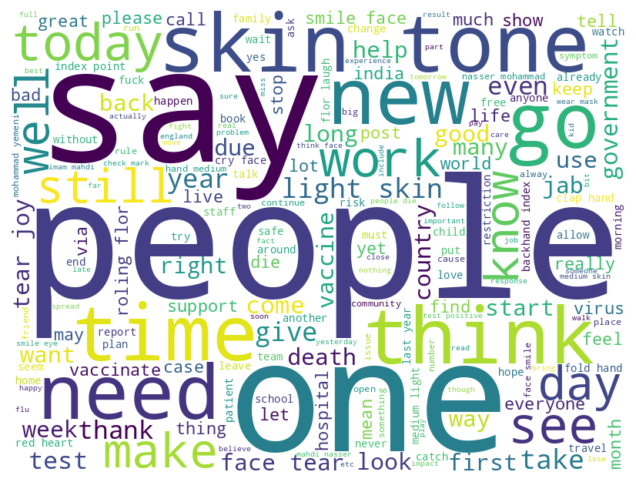

<Figure size 640x480 with 0 Axes>

In [8]:
#word cloud map
#https://www.datacamp.com/community/tutorials/wordcloud-python
def word_cloud(words):
    wordcloud = WordCloud(width=800, height=600, random_state=21, relative_scaling=0.5, background_color="white").generate(words)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
word_set = ' '.join([tweet_word for tweet_word in df['lemma_sentence(with POS)']])
word_cloud(word_set)
plt.savefig('word_cloud.jpg')
#vaccine is a hot topic

In [9]:
df['lemma'].value_counts()[0:10]

lemma
['disaster', 'corona', 'war', 'climate', 'war', 'surely', 'intensify', 'imam', 'mahdi', 'nasser', 'mohammad', 'yemeni', 'ramadan', 'coronandclimatewartragedy']                                                               68
['work', 'fernes', 'care', 'home', 'fareham', 'really', 'hard', 'challenging', 'time', 'really', 'want', 'thank', 'team', 'shout', 'video', 'would', 'eternally', 'grateful', 'boost', 'team', 'morale', 'worked', 'hard']    46
['calling', 'support', 'access', 'everyone', 'world', 'join']                                                                                                                                                                 40
['coronandclimatewartragedy', 'disaster', 'corona', 'war', 'climate', 'war', 'surely', 'intensify', 'imam', 'mahdi', 'nasser', 'mohammad', 'yemeni', 'ramadan']                                                               37
['help', 'slow', 'spread', 'identify', 'risk', 'case', 'sooner', 'self', 'reporting', 'symptom

In [11]:
# Word frequency (safe tokenizer, avoids LookupError)
from collections import Counter
texts = df['lemma_sentence(with POS)'].astype(str)
joined_text = '\n'.join(texts)

# Ensure punkt is available; download quietly if missing
import nltk
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt', quiet=True)

# Use previously defined safe_word_tokenize or define fallback
try:
    safe_word_tokenize
except NameError:
    import re
    def safe_word_tokenize(text: str):
        try:
            from nltk.tokenize import word_tokenize
            return word_tokenize(text)
        except LookupError:
            return [t for t in re.split(r'\W+', text) if t]

tokens = safe_word_tokenize(joined_text)
word_counts = Counter(tokens)
word_top = word_counts.most_common(n=20)
print(word_top)
# count_sum=

[('not', 25837), ('face', 12205), ('get', 11558), ('people', 9324), ('no', 6370), ('test', 6364), ('day', 5667), ('one', 5379), ('would', 5088), ('year', 5088), ('time', 5017), ('work', 4802), ('say', 4595), ('like', 4407), ('think', 4335), ('need', 4313), ('see', 4277), ('go', 4226), ('today', 4184), ('death', 4182)]


7769677


Text(0.5, 1.0, 'Word Frequency Chart')

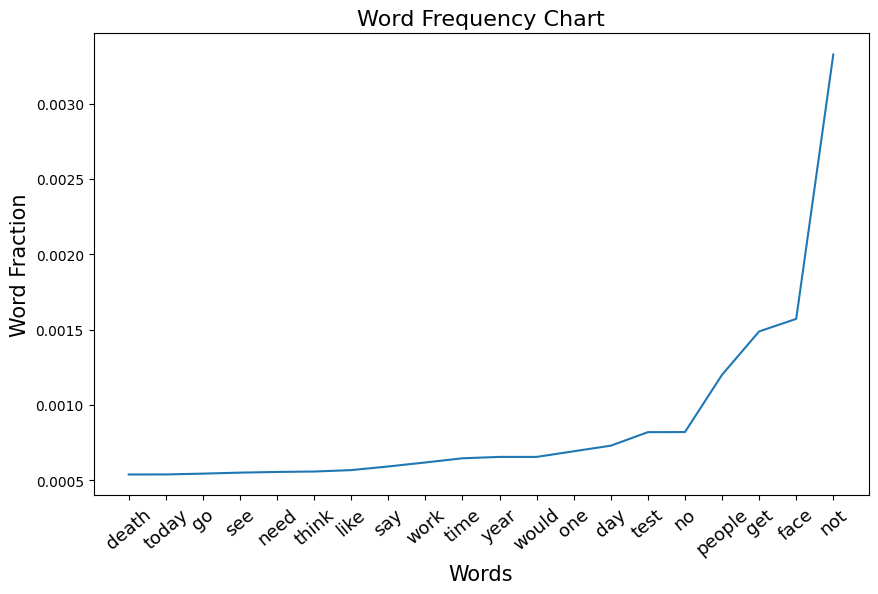

In [12]:
#(5)
count_all = df['lemma_sentence(with POS)'].str.len().sum()
print(count_all)

words=[count[0] for count in word_top]
frac_value=[int(count[1])/count_all for count in  word_top]
words=words[: :-1]
frac_value=sorted(frac_value)

#plot line chart
plt.figure(figsize=(10, 6))
plt.plot(words,frac_value)
plt.xticks(rotation=40, fontsize=13)
plt.xlabel('Words',fontsize=15)
plt.ylabel('Word Fraction',fontsize=15)
plt.title('Word Frequency Chart',fontsize=16)